In [2]:
import glob, os 
import pandas as pd
from scipy.stats import ttest_ind,chi2_contingency
import numpy as np
import fnmatch
import matplotlib.pyplot as plt


# Create a simplified version of the metadata

In [6]:
# Set the fmriprep directory
fmriprep_dir='/media/koba/MULTIBOOT/net/ascratch/people/plgkoba/stroke_BIDS_firs_sessions/derivatives/fmriprep/'

# Load metadata
participants=pd.read_csv("/media/koba/MULTIBOOT/net/ascratch/people/plgkoba/stroke_BIDS/participants.tsv", delimiter='\t' )

# Keep the info of the first sessions only
participants=participants[(participants['redcap_event_name']=='basic_subject_info_arm_2') | (participants['redcap_event_name']=='basic_subject_info_arm_1')]

# Remove the subject that were eliminated in the previous QA steps
for sub in participants.participant_id:
    if (os.path.isdir(os.path.join(fmriprep_dir,sub))) == False:
        participants=participants.drop(participants[participants['participant_id'] == sub].index)

# Remove the bad quality subjects  - the list includes faulty output from fmriprep, xcp_d, rapidtide
bad_quality_subjects='sub-CON013|sub-PAT026|sub-PAT045|sub-PAT050|sub-PAT069|sub-PAT091|sub-PAT110|sub-PAT128|sub-PAT054|sub-PAT135|sub-PAT143|sub-PAT195|sub-CON016|sub-CON017|sub-PAT088|sub-PAT093|sub-PAT125|sub-PAT187|sub-PAT050|sub-PAT087|sub-CON005|sub-CON029|sub-PAT114|sub-PAT154|sub-PAT072|sub-PAT195'
#

participants=participants[participants['participant_id'].str.contains(bad_quality_subjects)==False]

# Keep ischemic stroke subjects
participants=participants.drop((participants[participants['lesion_type'] == 1]).index)
participants=participants.drop((participants[participants['lesion_type'] == 2]).index)
participants.head()

,participant_id,redcap_event_name,subj_type,inclusion,inclusion_notes,lesion_side,basic_study_information_complete,acute_beh,acute_scan,missed_visit_a,...,sf36_pain,sf36_gen,functional_outcome_battery_complete,sensory_collection_v2,body_id_v2___1,body_id_v2___2,body_id_v2___3,body_id_v2___4,body_id_v2___5,sensory_battery_2_complete
0,sub-CON001,basic_subject_info_arm_2,1.0,0.0,4.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub-CON002,basic_subject_info_arm_2,1.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub-CON003,basic_subject_info_arm_2,1.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,sub-CON006,basic_subject_info_arm_2,1.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,sub-CON007,basic_subject_info_arm_2,1.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Save the table 
participants.to_csv('/home/koba/Desktop/Stroke/scripts/subjects.csv')

#sublist=$(awk -F ',' '{print $2}' /home/koba/Desktop/Stroke/scripts/subjects.csv | tail -n +2)
        #for i in $(echo $sublist);do find fmriprep/ -type f | grep "desc-confounds_timeseries.tsv"| grep "$i";done  | sort | grep sub-PAT024 > source/confounds.txt
#for i in $(echo $sublist);do find fmriprep/ -type f | grep "MNI152NLin2009cAsym_desc-brain_mask.nii.gz"| grep -v anat | grep "$i";done | sort | grep sub-PAT024 > source/mask_files.txt
# for i in $(echo $sublist);do find fmriprep/ -type f | grep "MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"| grep -v anat | grep "$i";done | sort | grep sub-PAT027 > source/func_files.txt


# Create the behavioral data

In [4]:
# Set the fmriprep directory
fmriprep_dir='/media/koba/MULTIBOOT/net/ascratch/people/plgkoba/stroke_BIDS_firs_sessions/derivatives/fmriprep/'

# Load metadata
participants=pd.read_csv("/media/koba/MULTIBOOT/net/ascratch/people/plgkoba/stroke_BIDS/participants.tsv", delimiter='\t' )

# Keep the info of the first sessions only
participants=participants[(participants['redcap_event_name']=='visit_1_arm_2') | (participants['redcap_event_name']=='acute_arm_1')]

# Remove the subject that were eliminated in the previous QA steps
for sub in participants.participant_id:
    if (os.path.isdir(os.path.join(fmriprep_dir,sub))) == False:
        participants=participants.drop(participants[participants['participant_id'] == sub].index)

# Remove the bad quality subjects  - the list includes faulty output from fmriprep, xcp_d, rapidtide
bad_quality_subjects='sub-CON013|sub-PAT026|sub-PAT045|sub-PAT050|sub-PAT069|sub-PAT091|sub-PAT110|sub-PAT128|sub-PAT054|sub-PAT135|sub-PAT143|sub-PAT195|sub-CON016|sub-CON017|sub-PAT088|sub-PAT093|sub-PAT125|sub-PAT187|sub-PAT050|sub-PAT087|sub-CON005|sub-CON029|sub-PAT114|sub-PAT154|sub-PAT072|sub-PAT195'
#

participants=participants[participants['participant_id'].str.contains(bad_quality_subjects)==False]

# Keep ischemic stroke subjects
participants=participants.drop((participants[participants['lesion_type'] == 1]).index)
participants=participants.drop((participants[participants['lesion_type'] == 2]).index)
participants.head()

,participant_id,redcap_event_name,subj_type,inclusion,inclusion_notes,lesion_side,basic_study_information_complete,acute_beh,acute_scan,missed_visit_a,...,sf36_pain,sf36_gen,functional_outcome_battery_complete,sensory_collection_v2,body_id_v2___1,body_id_v2___2,body_id_v2___3,body_id_v2___4,body_id_v2___5,sensory_battery_2_complete
2,sub-CON002,visit_1_arm_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,95.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,sub-CON003,visit_1_arm_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.0,85.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,sub-CON006,visit_1_arm_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57.5,80.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,sub-CON007,visit_1_arm_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,80.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,sub-CON008,visit_1_arm_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.0,100.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
participants.shape

(154, 714)

In [6]:
# Save the table 
participants.to_csv('/home/koba/Desktop/Stroke/scripts/behavioral.csv')

#sublist=$(awk -F ',' '{print $2}' /home/koba/Desktop/Stroke/scripts/subjects.csv | tail -n +2)
        #for i in $(echo $sublist);do find fmriprep/ -type f | grep "desc-confounds_timeseries.tsv"| grep "$i";done  | sort | grep sub-PAT024 > source/confounds.txt
#for i in $(echo $sublist);do find fmriprep/ -type f | grep "MNI152NLin2009cAsym_desc-brain_mask.nii.gz"| grep -v anat | grep "$i";done | sort | grep sub-PAT024 > source/mask_files.txt
# for i in $(echo $sublist);do find fmriprep/ -type f | grep "MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"| grep -v anat | grep "$i";done | sort | grep sub-PAT027 > source/func_files.txt


# Group-level differences 

In [7]:
print('Total number of subjects: ' + str(participants.shape[0]))
print('Number of control subjects: ' + str(participants[(participants['redcap_event_name']=='basic_subject_info_arm_2')].shape[0]))
print('Number of stroke subjects: ' + str(participants[(participants['redcap_event_name']=='basic_subject_info_arm_1')].shape[0]))
print('\n')
controls_age=participants[(participants['subj_type']==1)].age
controls_age_mean=controls_age.mean()
controls_age_std=controls_age.std()

stroke_age=participants[(participants['subj_type']==0)].age
stroke_age_mean=stroke_age.mean()
stroke_age_std=stroke_age.std()

print('Mean/std age of controls: ' + str(controls_age_mean) + " " + str(controls_age_std))
print('Mean/std age of stroke: ' + str(stroke_age_mean) + " " + str(stroke_age_std))
print('There is no difference between age of groups: ' +  str(ttest_ind(controls_age,stroke_age)))
print('\n')

crosstab=pd.crosstab(participants.gender.astype("category"),participants.subj_type.astype("category"))
#pd.crosstab(participants.gender.astype("category"),participants.subj_type.astype("category")))
print('Sex distribution: 0=Male, 0= Stroke ')
print(crosstab)
chi2, p, dof, expected  = chi2_contingency(crosstab)
print('There is no difference between sex distribution of groups: ' + str(p) + ' ' + str(chi2))



Total number of subjects: 130
Number of control subjects: 26
Number of stroke subjects: 104


Mean/std age of controls: 55.30769230769231 12.942238541362869
Mean/std age of stroke: 53.50961538461539 10.736920417177803
There is no difference between age of groups: Ttest_indResult(statistic=0.7320680927912726, pvalue=0.46546529252087354)


Sex distribution: 0=Male, 0= Stroke 
subj_type  0.0  1.0
gender             
0.0         54   10
1.0         50   16
There is no difference between sex distribution of groups: 0.31310121077386477 1.0175485321969697


# Framewise displacement 

In [8]:
fmriprep_dir='/media/koba/MULTIBOOT/net/ascratch/people/plgkoba/stroke_BIDS_firs_sessions/derivatives/fmriprep/'

In [9]:
# Save mean, var, and max of FD across all runs

fds_mean = []
fds_var = []
fds_max=[]
sub_name = []
for subs in participants.participant_id:
    file_names = []
    search_str="SUB*confounds_time*tsv"
    search_str_sub=search_str.replace('SUB',subs)
    # Search for files in the current directory and its subdirectories
    for root, _, files in os.walk(fmriprep_dir):
        for file in files:
            if fnmatch.fnmatch(file, search_str_sub):
                file_names.append(os.path.join(root, file))
                
    data_frames = []
    for tsv_file in file_names:
        data_frame = pd.read_csv(tsv_file, sep='\t')  # Assumes tab-separated values
        fds_mean.append(data_frame.framewise_displacement.mean())
        fds_var.append(data_frame.framewise_displacement.var())
        fds_max.append(data_frame.framewise_displacement.max())
        sub_name.append(subs)
    

In [11]:
df

,Subs,FDs_mean,FDs_var,FDs_max
0,sub-CON001,0.293713,0.171181,3.302030
1,sub-CON001,0.179916,0.028266,1.236351
2,sub-CON001,0.377508,0.226605,2.483708
3,sub-CON002,0.324598,0.182967,2.428397
4,sub-CON002,0.695707,1.145421,7.137646
...,...,...,...,...
870,sub-PAT196,0.369719,0.105521,3.116573
871,sub-PAT196,0.333331,0.016554,0.789619
872,sub-PAT196,0.388988,0.058309,1.880110
873,sub-PAT196,0.326929,0.029746,1.007914


In [9]:
print('Mean FD in Control: ', df[df['Subs'].str.contains('CON')].FDs_mean.mean())
print('Mean FD in Stroke: ', df[df['Subs'].str.contains('PAT')].FDs_mean.mean())

print('\nMean Var of FD in Control: ', df[df['Subs'].str.contains('CON')].FDs_var.mean())
print('Mean Var of FD in Stroke: ', df[df['Subs'].str.contains('PAT')].FDs_var.mean())

print('\nMean Max of FD in Control: ', df[df['Subs'].str.contains('CON')].FDs_max.mean())
print('Mean Max of FD in Stroke: ', df[df['Subs'].str.contains('PAT')].FDs_max.mean())

Mean FD in Control:  0.4921701464505172
Mean FD in Stroke:  0.406956925431422

Mean Var of FD in Control:  0.17661431484183848
Mean Var of FD in Stroke:  0.2584581276843546

Mean Max of FD in Control:  2.1662851555267326
Mean Max of FD in Stroke:  2.1758644372236557


In [12]:
print('Mean FD between groups :', ttest_ind(df[df['Subs'].str.contains('CON')].FDs_mean, df[df['Subs'].str.contains('PAT')].FDs_mean))
print('Var FD between groups :',ttest_ind(df[df['Subs'].str.contains('CON')].FDs_var, df[df['Subs'].str.contains('PAT')].FDs_var))
print('Max FD between groups :',ttest_ind(df[df['Subs'].str.contains('CON')].FDs_max, df[df['Subs'].str.contains('PAT')].FDs_max))




Mean FD between groups : Ttest_indResult(statistic=4.818074854829299, pvalue=1.6869998442916982e-06)
Var FD between groups : Ttest_indResult(statistic=-0.8619331544885467, pvalue=0.3889422736210755)
Max FD between groups : Ttest_indResult(statistic=0.24610832780313988, pvalue=0.8056516518074113)


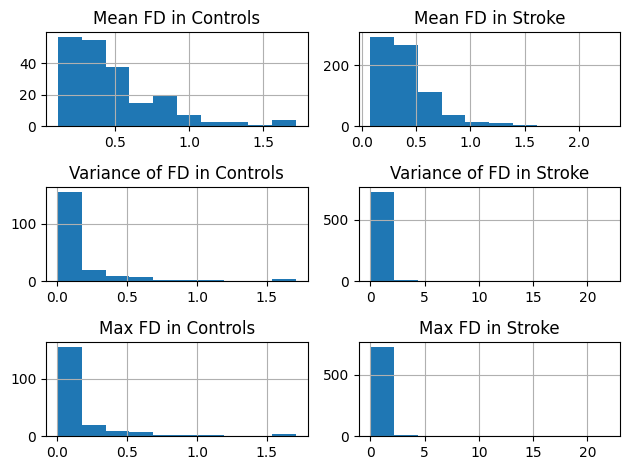

In [10]:
plt.subplot(3, 2, 1)  
df[df['Subs'].str.contains('CON')].FDs_mean.hist()
plt.title('Mean FD in Controls')

plt.subplot(3, 2, 2)  
df[df['Subs'].str.contains('PAT')].FDs_mean.hist()
plt.title('Mean FD in Stroke')

plt.subplot(3, 2, 3)  
df[df['Subs'].str.contains('CON')].FDs_var.hist()
plt.title('Variance of FD in Controls')

plt.subplot(3, 2, 4)  
df[df['Subs'].str.contains('PAT')].FDs_var.hist()
plt.title('Variance of FD in Stroke')

plt.subplot(3, 2, 5)  
df[df['Subs'].str.contains('CON')].FDs_var.hist()
plt.title('Max FD in Controls')

plt.subplot(3, 2, 6)  
df[df['Subs'].str.contains('PAT')].FDs_var.hist()
plt.title('Max FD in Stroke')

plt.tight_layout()  # Ensures the subplots don't overlap

In [11]:
Pat_max=pd.DataFrame(df[df['Subs'].str.contains('PAT')].FDs_max)
Con_max=pd.DataFrame(df[df['Subs'].str.contains('CON')].FDs_max)

Text(0.5, 1.0, 'Max FD >1 in stroke')

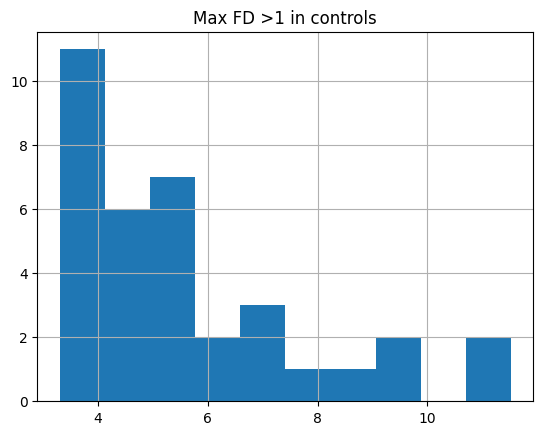

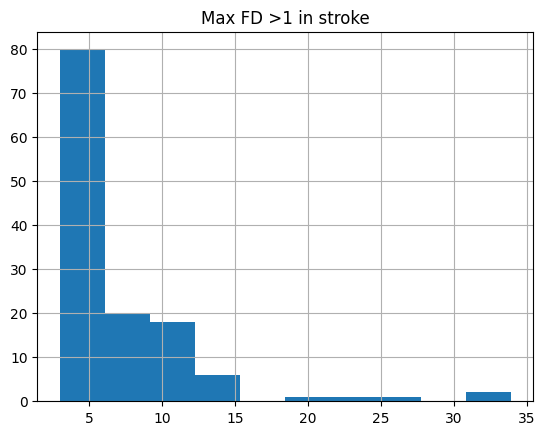

In [12]:
Con_max[(Con_max > 3).any(axis=1)].hist()
plt.title('Max FD >1 in controls')
Pat_max[(Pat_max > 3).any(axis=1)].hist()
plt.title('Max FD >1 in stroke')



# Other potentially relevant data


In [13]:

print('Handedness')
#print(participants[participants['subj_type']==0].handed.value_counts())
#print(participants[participants['subj_type']==1].handed.value_counts())
crosstab=pd.crosstab(participants.handed.astype('category'),participants.subj_type.astype("category"))
print(crosstab)
chi2, p, dof, expected  = chi2_contingency(crosstab)
print('There is no difference between handedness distribution of groups: ' + str(p) + ' ' + str(chi2))
print('\n')

print('Education mean and sd for both groups')
print(participants[participants['subj_type']==0].education.mean())
print(participants[participants['subj_type']==0].education.std())
print(participants[participants['subj_type']==1].education.mean())
print(participants[participants['subj_type']==1].education.std())
print(ttest_ind(participants[participants['subj_type']==0].education,participants[participants['subj_type']==1].education))
print('\n')



print('Race')
crosstab=pd.crosstab(participants.race.astype('category'),participants.subj_type.astype("category"))
print(crosstab)
chi2, p, dof, expected  = chi2_contingency(crosstab)
print('There is a sig. difference between race distribution of groups: ' + str(p) + ' ' + str(chi2))
print(' There is more Black or African American subjects in stroke group')
print('\n')


print('Smokers')
crosstab=pd.crosstab(participants.smoke.astype('category'),participants.subj_type.astype("category"))
print(crosstab)
chi2, p, dof, expected  = chi2_contingency(crosstab)
print('There is on sig. difference between smokier distribution of groups: ' + str(p) + ' ' + str(chi2))
print('\n')

# Information on the ICA occlusion - can be a potential regressor
print(participants.ica.value_counts())

Handedness
subj_type  0.0  1.0
handed             
0.0         11    2
1.0         99   28
There is no difference between handedness distribution of groups: 0.8393185292490661 0.04111374190114351


Education mean and sd for both groups
13.263636363636364
2.503858573574738
13.466666666666667
2.812942174691993
Ttest_indResult(statistic=-0.3832661783828372, pvalue=0.7021121808121145)


Race
subj_type  0.0  1.0
race               
3.0         73   20
4.0         37   10
There is a sig. difference between race distribution of groups: 1.0 0.0
 There is more Black or African American subjects in stroke group


Smokers
subj_type  0.0  1.0
smoke              
0.0         54   17
1.0         56   13
There is on sig. difference between smokier distribution of groups: 0.5963234491917524 0.28057674107888453


ica
1.0    50
0.0    44
2.0     7
3.0     6
4.0     2
5.0     1
Name: count, dtype: int64


Text(0.5, 1.0, 'distribution of number number of runs, most subjects have 7 runs ')

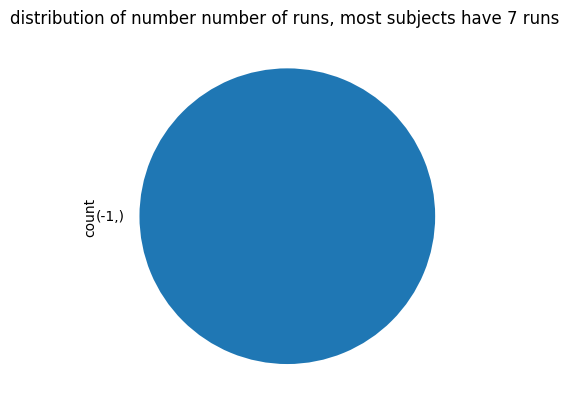

In [20]:
# Check the number of available runs for each subject
totalruns=[]
for i in range(0,participants.shape[0]):
    runs_str="SUBID/ses-SESS/func/"
    sub_str=runs_str.replace('SUBID',participants.iloc[i,:].participant_id)
    if participants.iloc[i,:].subj_type==1:
        sub_str=sub_str.replace('SESS','control')
    else:
        sub_str=sub_str.replace('SESS','acute')
    sub_dir=os.path.join(fmriprep_dir, sub_str)
    os.chdir(sub_dir)
    
    name=[]
    
    for file in glob.glob("*Smoothed_bold.nii.gz"):
        #print(file)
        name.append(file)
    totalruns.append(len(name)-1)
    
participants.loc[np.array(totalruns)>7]

pd.DataFrame(totalruns).value_counts().plot.pie()
plt.title('distribution of number number of runs, most subjects have 7 runs ')


In [18]:
totalruns


[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1]

In [16]:
sub_dir

'/media/koba/MULTIBOOT/net/ascratch/people/plgkoba/stroke_BIDS_firs_sessions/derivatives/fmriprep/sub-PAT196/ses-acute/func/'